# Determining Factors that Affect Amount Awarded to Projects

In [170]:
import pandas as pd

#Read in data and view first few columns
df = pd.read_csv('PublicAssistanceFundedProjectsDetails.csv', sep=",")
df.head()

,disasterNumber,declarationDate,incidentType,pwNumber,applicationTitle,applicantId,damageCategoryCode,dcc,damageCategory,projectSize,...,state,stateCode,stateNumberCode,projectAmount,federalShareObligated,totalObligated,obligatedDate,hash,id,lastRefresh
0,1603,2005-08-29T00:00:00.000Z,Hurricane,21075,HANO - Lafitte Homeownership Improved Project ...,071-U8M7N-00,E - Public Buildings,E,Public Buildings,Large,...,Louisiana,LA,22,-1351843.17,-1351843.17,-1365395.40,2022-10-31T00:00:00.000Z,d0953e1851755872e5271b6e4e0c1906b8a01a95,db36ea91-ee6b-40ad-86a6-c4424ad2fab7,2022-11-01T17:05:52.536Z
1,4337,2017-09-10T00:00:00.000Z,Hurricane,585,13034 - City of Marathon Debris Removal CAT A ...,087-43000-00,A - Debris Removal,A,Debris Removal,Large,...,Florida,FL,12,3161467.69,2845320.92,2845320.92,2019-07-10T00:00:00.000Z,fa550fed9d99f033fc595e4baa5ee079bc85c12b,33cf9299-8cce-42db-86ff-d4c88f23fa44,2022-11-01T17:09:55.345Z
2,4491,2020-03-26T00:00:00.000Z,Biological,430,672305 - Feeding Programs - Produce Box 2022 Q3,510-04000-00,B - Protective Measures,B,Protective Measures,Large,...,Maryland,MD,24,2497127.50,2497127.50,2497127.50,2022-10-31T00:00:00.000Z,5a408f90fb141b6b165b0eb1fcea72c1746c9f70,77a5aa16-aa5f-471f-8012-f4ea591b9bd7,2022-11-01T17:10:29.194Z
3,4339,2017-09-20T00:00:00.000Z,Hurricane,5009,111510 - MMOC037 - A&E Sport Complex Cuchillas...,099-99099-00,G - Recreational or Other,G,Recreational or Other,Large,...,Puerto Rico,PR,72,3030387.44,2727348.70,2727348.70,2020-04-29T00:00:00.000Z,98ea1ccea8d9296ec41b54fcde7c603668f406ef,496d42d3-34b9-4fc2-9cd6-76537012b27b,2022-11-09T17:10:15.929Z
4,1603,2005-08-29T00:00:00.000Z,Hurricane,21076,HANO-Lafitte Homeownership Improved Proj Sub-p...,071-U8M7N-00,E - Public Buildings,E,Public Buildings,Large,...,Louisiana,LA,22,0.00,0.00,0.02,2018-04-13T00:00:00.000Z,1405ef7b056dd33ff4fd40ca295de2f0d520cd0f,d4bcc13b-263d-4e9a-9114-32df04c24876,2022-11-01T17:05:52.537Z


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780894 entries, 0 to 780893
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   disasterNumber         780894 non-null  int64  
 1   declarationDate        780894 non-null  object 
 2   incidentType           780894 non-null  object 
 3   pwNumber               780894 non-null  int64  
 4   applicationTitle       774672 non-null  object 
 5   applicantId            780894 non-null  object 
 6   damageCategoryCode     780894 non-null  object 
 7   dcc                    780894 non-null  object 
 8   damageCategory         780894 non-null  object 
 9   projectSize            767886 non-null  object 
 10  county                 767886 non-null  object 
 11  countyCode             767886 non-null  float64
 12  state                  780894 non-null  object 
 13  stateCode              780894 non-null  object 
 14  stateNumberCode        780894 non-nu

In [172]:
print("Dimension of the data: ", df.shape)

no_of_rows = df.shape[0]
no_of_columns = df.shape[1]

print("No. of Rows: %d" % no_of_rows)
print("No. of Columns: %d" % no_of_columns)

Dimension of the data:  (780894, 22)
No. of Rows: 780894
No. of Columns: 22


There are 22 columns and 780894 rows.

In [173]:
#Statistics of all non-categorical attributes
df.describe()

,disasterNumber,pwNumber,countyCode,stateNumberCode,projectAmount,federalShareObligated,totalObligated
count,780894.000000,780894.000000,767886.000000,780894.000000,7.808940e+05,7.808940e+05,7.808940e+05
mean,2550.752932,1705.726216,69.507659,31.492457,2.692804e+05,2.480652e+05,2.488517e+05
std,1235.642952,2863.067978,81.808223,16.819744,1.668811e+07,1.594776e+07,1.595180e+07
min,1239.000000,1.000000,0.000000,1.000000,-3.726871e+08,-3.726871e+08,-3.764233e+08
25%,1603.000000,193.000000,11.000000,19.000000,3.521775e+03,2.772620e+03,2.861707e+03
50%,1829.000000,597.000000,51.000000,31.000000,1.079688e+04,8.622865e+03,8.856875e+03
75%,4077.000000,1733.000000,103.000000,42.000000,3.810900e+04,3.079241e+04,3.151581e+04
max,4677.000000,83562.000000,840.000000,78.000000,9.553782e+09,9.553782e+09,9.553782e+09


In [174]:
#Value Counts for Categorical Columns
#Print the value counts for categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        print("\nColumn Name:", col,)
        print(df[col].value_counts())


Column Name: declarationDate
2005-08-29T00:00:00.000Z    27386
2008-09-13T00:00:00.000Z    16222
2011-08-31T00:00:00.000Z    15382
1998-09-24T00:00:00.000Z    13008
2017-09-20T00:00:00.000Z    11873
                            ...  
2022-09-15T00:00:00.000Z        1
2007-07-31T00:00:00.000Z        1
2020-08-23T00:00:00.000Z        1
2022-09-02T00:00:00.000Z        1
2022-05-25T00:00:00.000Z        1
Name: declarationDate, Length: 1152, dtype: int64

Column Name: incidentType
Severe Storm         333876
Hurricane            246798
Flood                 85309
Snowstorm             35685
Severe Ice Storm      25280
Biological            23375
Fire                   9752
Tornado                6229
Earthquake             5015
Typhoon                4134
Coastal Storm          3093
Other                  1131
Mud/Landslide           310
Dam/Levee Break         203
Freezing                200
Tsunami                 181
Terrorist               107
Severe Storm(s)          81
Volcanic Erupti

There are several categorical column values, such as incident type, damage category code, and project size. These attributes will be converted to binary values via one-hot encoding.

In [175]:
#For target attribute "project amount" 
df['projectAmount']

0         -1351843.17
1          3161467.69
2          2497127.50
3          3030387.44
4                0.00
             ...     
780889       25636.43
780890       70484.21
780891        7738.90
780892    17873537.45
780893      223807.61
Name: projectAmount, Length: 780894, dtype: float64

In [176]:
#Distribution of project amount 
df['projectAmount'].describe()

count    7.808940e+05
mean     2.692804e+05
std      1.668811e+07
min     -3.726871e+08
25%      3.521775e+03
50%      1.079688e+04
75%      3.810900e+04
max      9.553782e+09
Name: projectAmount, dtype: float64

The mean amount spent on projects was $269,280.

In [177]:
#Value counts of target column
df['projectAmount'].value_counts()

0.00           30525
1000.00         3856
500.00          1793
5000.00         1403
2500.00         1050
               ...  
6346.51            1
9440.22            1
37471.04           1
62691.85           1
17873537.45        1
Name: projectAmount, Length: 600645, dtype: int64

array([[<AxesSubplot:xlabel='disasterNumber', ylabel='disasterNumber'>,
        <AxesSubplot:xlabel='pwNumber', ylabel='disasterNumber'>,
        <AxesSubplot:xlabel='countyCode', ylabel='disasterNumber'>,
        <AxesSubplot:xlabel='stateNumberCode', ylabel='disasterNumber'>,
        <AxesSubplot:xlabel='projectAmount', ylabel='disasterNumber'>,
        <AxesSubplot:xlabel='federalShareObligated', ylabel='disasterNumber'>,
        <AxesSubplot:xlabel='totalObligated', ylabel='disasterNumber'>],
       [<AxesSubplot:xlabel='disasterNumber', ylabel='pwNumber'>,
        <AxesSubplot:xlabel='pwNumber', ylabel='pwNumber'>,
        <AxesSubplot:xlabel='countyCode', ylabel='pwNumber'>,
        <AxesSubplot:xlabel='stateNumberCode', ylabel='pwNumber'>,
        <AxesSubplot:xlabel='projectAmount', ylabel='pwNumber'>,
        <AxesSubplot:xlabel='federalShareObligated', ylabel='pwNumber'>,
        <AxesSubplot:xlabel='totalObligated', ylabel='pwNumber'>],
       [<AxesSubplot:xlabel='disasterN

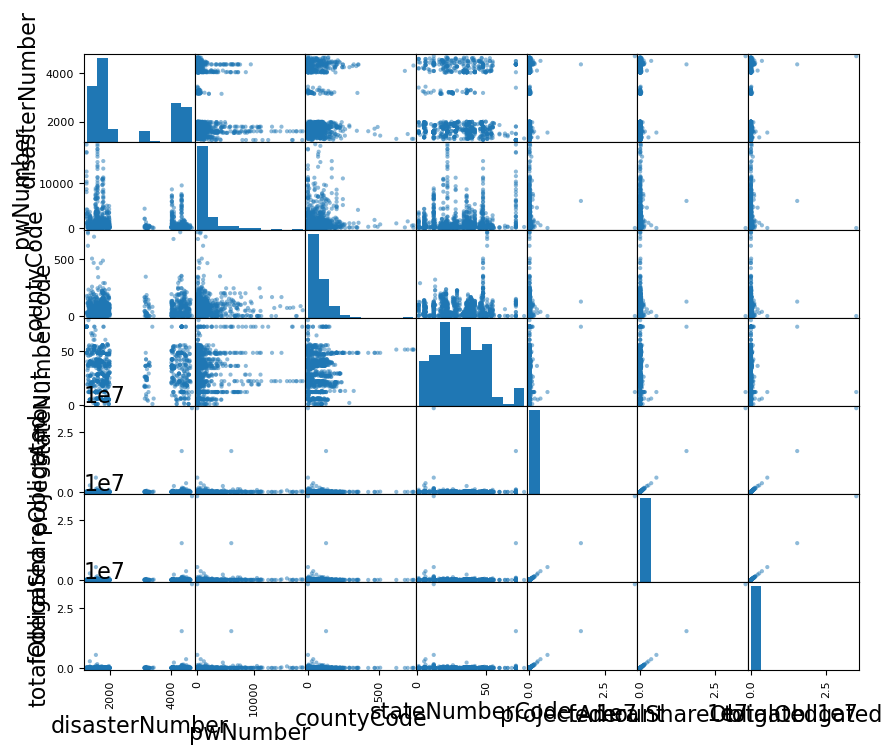

In [178]:
from pandas.plotting import scatter_matrix
attributes = ['disasterNumber', 'pwNumber', 'countyCode', 'stateNumberCode', 'projectAmount', 'federalShareObligated', 'totalObligated']

scatter_matrix(df.sample(1000), figsize=(10, 8))


The scatter matrix of all non-categorical attributes shows the relationships between all the variables, such as total obligated amount with state number code. 

In [179]:
# Select only categorical variables that affect project amount
# One hot encode the variables using pandas

dummy_df = pd.get_dummies(df, columns = ['incidentType', 'dcc', 'projectSize', 'state'])
dummy_df.head()


,disasterNumber,declarationDate,pwNumber,applicationTitle,applicantId,damageCategoryCode,damageCategory,county,countyCode,stateCode,...,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virgin Islands of the U.S.,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,1603,2005-08-29T00:00:00.000Z,21075,HANO - Lafitte Homeownership Improved Project ...,071-U8M7N-00,E - Public Buildings,Public Buildings,Orleans,71.0,LA,...,0,0,0,0,0,0,0,0,0,0
1,4337,2017-09-10T00:00:00.000Z,585,13034 - City of Marathon Debris Removal CAT A ...,087-43000-00,A - Debris Removal,Debris Removal,Monroe,87.0,FL,...,0,0,0,0,0,0,0,0,0,0
2,4491,2020-03-26T00:00:00.000Z,430,672305 - Feeding Programs - Produce Box 2022 Q3,510-04000-00,B - Protective Measures,Protective Measures,Baltimore (city),510.0,MD,...,0,0,0,0,0,0,0,0,0,0
3,4339,2017-09-20T00:00:00.000Z,5009,111510 - MMOC037 - A&E Sport Complex Cuchillas...,099-99099-00,G - Recreational or Other,Recreational or Other,Moca,99.0,PR,...,0,0,0,0,0,0,0,0,0,0
4,1603,2005-08-29T00:00:00.000Z,21076,HANO-Lafitte Homeownership Improved Proj Sub-p...,071-U8M7N-00,E - Public Buildings,Public Buildings,Orleans,71.0,LA,...,0,0,0,0,0,0,0,0,0,0


The dummy dataframe now has binary values for all categorical attributes of the dataset.

In [180]:
# Put the target back in the dataframe
dummy_df['projectAmount'] = df['projectAmount']
# Correlations in one-hot encoded dataframe
dummy_df.corr()['projectAmount'].sort_values(ascending=False)

projectAmount                1.000000
federalShareObligated        0.998575
totalObligated               0.998564
projectSize_Large            0.033624
incidentType_Biological      0.024007
                               ...   
incidentType_Flood          -0.003675
countyCode                  -0.006475
dcc_C                       -0.008627
incidentType_Severe Storm   -0.010989
projectSize_Small           -0.031789
Name: projectAmount, Length: 96, dtype: float64

After putting the target back into the dataframe, the most correlated attributes were sorted from most to least, and they include federal share obligated, total obligated, project size, incident type, etc.

In [181]:
# Drop unnecessary variables
df = df.drop(labels=['applicationTitle', 'applicantId', 'damageCategory', 'damageCategoryCode', 'pwNumber', 'declarationDate', 'disasterNumber', 'county', 'stateCode', 
                     'federalShareObligated', 'totalObligated', 'obligatedDate', 'hash', 'id', 'lastRefresh'], axis = 1) 
df.head()

,incidentType,dcc,projectSize,countyCode,state,stateNumberCode,projectAmount
0,Hurricane,E,Large,71.0,Louisiana,22,-1351843.17
1,Hurricane,A,Large,87.0,Florida,12,3161467.69
2,Biological,B,Large,510.0,Maryland,24,2497127.50
3,Hurricane,G,Large,99.0,Puerto Rico,72,3030387.44
4,Hurricane,E,Large,71.0,Louisiana,22,0.00


Some unneccessary attributes were dropped from the dataframe, such as applicant ID and pw number. 

In [182]:
# Combine the one-hot coded categorical features with the numerical features
df = pd.get_dummies(df)

# Identify the most correlated features 

# Find correlations with the target variable i.e. Project Amount using abs value to calculate correlation coefficient
most_correlated = df.corr().abs()['projectAmount'].sort_values(ascending=False)

# Maintain the top most correlation features with Project Amount
most_correlated = most_correlated[:8]

print("Most Correlated Features:\n")
print(most_correlated)

Most Correlated Features:

projectAmount                1.000000
projectSize_Large            0.033624
projectSize_Small            0.031789
incidentType_Biological      0.024007
incidentType_Severe Storm    0.010989
state_Puerto Rico            0.009746
dcc_C                        0.008627
dcc_F                        0.006780
Name: projectAmount, dtype: float64


In [183]:
import warnings
warnings.filterwarnings('ignore')

# See the most correlated column names
print("Most Correlated Index: ", most_correlated.index)

# Edit the DataFrame to Contain Only the Most Correlated Features¶
df = df.loc[:, most_correlated.index]

df.head()

Most Correlated Index:  Index(['projectAmount', 'projectSize_Large', 'projectSize_Small',
       'incidentType_Biological', 'incidentType_Severe Storm',
       'state_Puerto Rico', 'dcc_C', 'dcc_F'],
      dtype='object')


,projectAmount,projectSize_Large,projectSize_Small,incidentType_Biological,incidentType_Severe Storm,state_Puerto Rico,dcc_C,dcc_F
0,-1351843.17,1,0,0,0,0,0,0
1,3161467.69,1,0,0,0,0,0,0
2,2497127.50,1,0,1,0,0,0,0
3,3030387.44,1,0,0,0,1,0,0
4,0.00,1,0,0,0,0,0,0


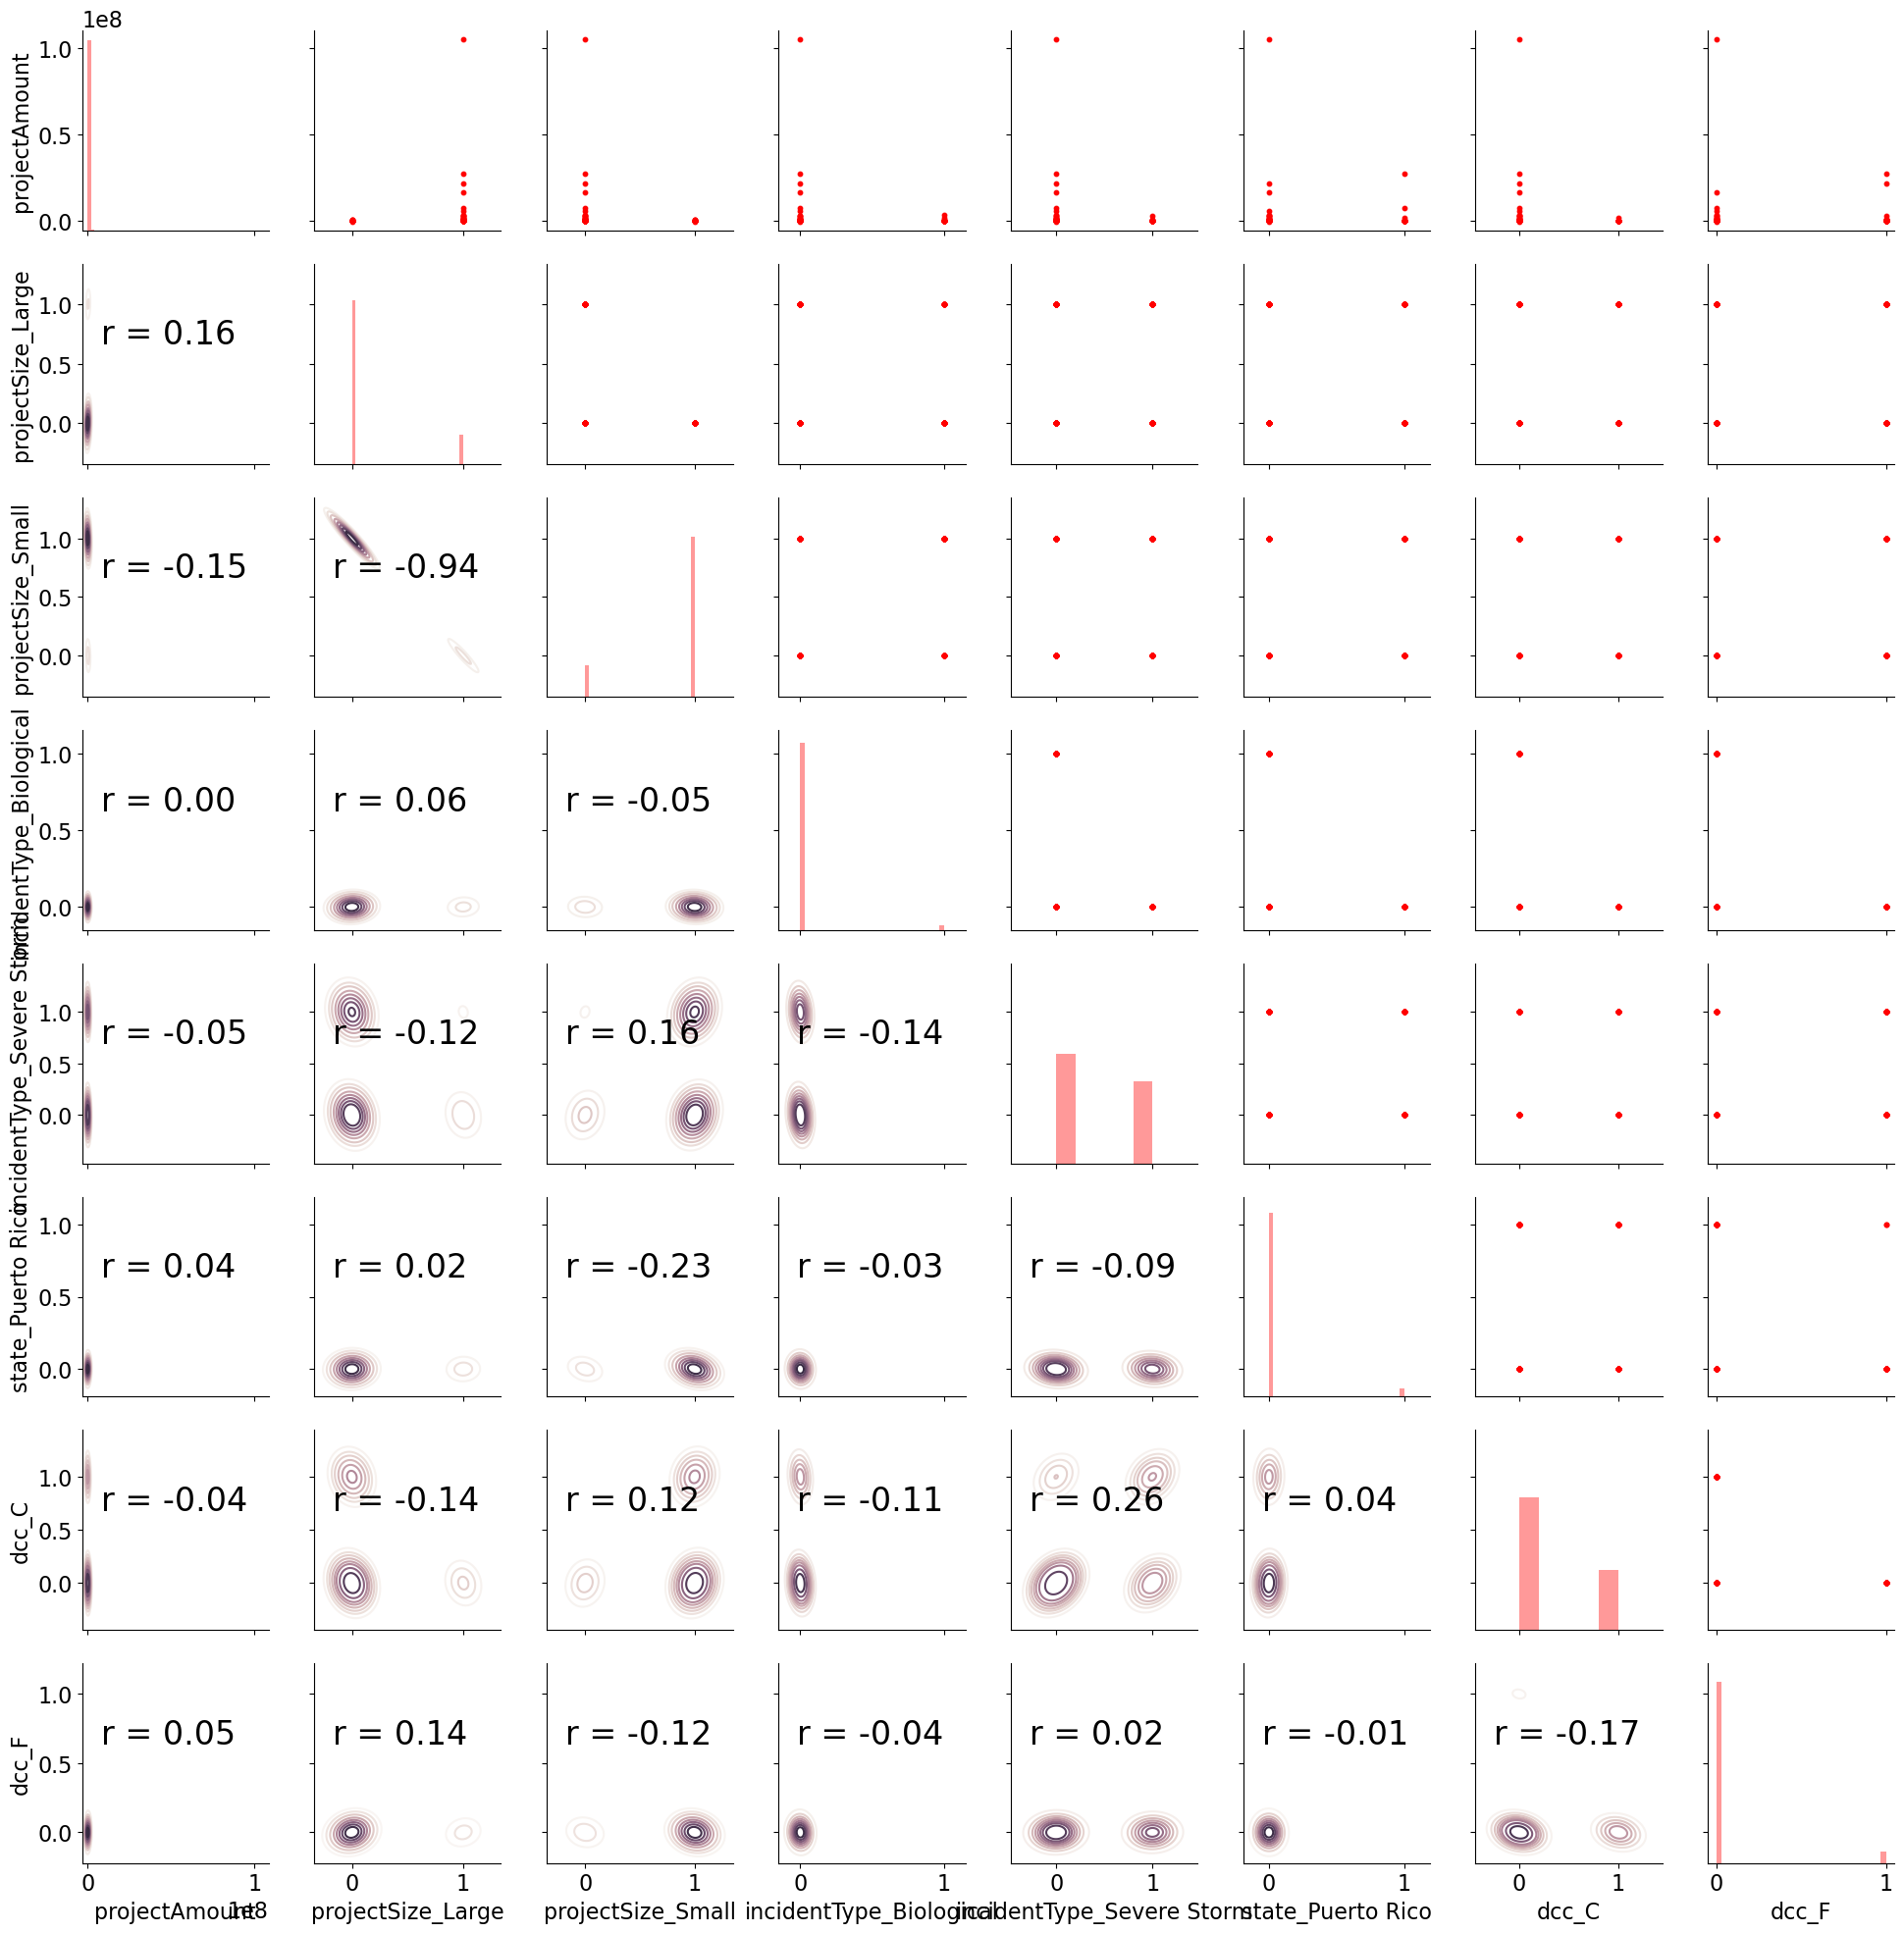

In [184]:
# Implement pairplot to identify relationships between variables
import warnings
warnings.filterwarnings('ignore')


# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=1)

# Pair grid set up
g = sns.PairGrid(df.sample(1000))

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

The pair plot shows the correlation between the attributes and the target variable. The most correlated attributes are project size and incident type.